# Zadanie: baza filmów

## Ładowanie potrzebnych bibliotek

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Ładowanie danych do dataframe'ów

In [5]:
genres_df = pd.read_csv("tmdb_genres.csv")
movies_df = pd.read_csv("tmdb_movies.csv")

## 1. Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.

In [7]:
third_quartile = movies_df["vote_count"].quantile(0.75)
top_10_movies = (
    movies_df[movies_df["vote_count"] > third_quartile]
    .sort_values(by="vote_average", ascending=False)
    .head(10)
    .reset_index()[["title", "vote_average", "vote_count"]]
)
print("Top 10 najwyżej ocenianych filmów:")
top_10_movies

Top 10 najwyżej ocenianych filmów:


,title,vote_average,vote_count
0,The Shawshank Redemption,8.5,8205
1,The Godfather,8.4,5893
2,Spirited Away,8.3,3840
3,Whiplash,8.3,4254
4,The Godfather: Part II,8.3,3338
5,Pulp Fiction,8.3,8428
6,Schindler's List,8.3,4329
7,Fight Club,8.3,9413
8,Psycho,8.2,2320
9,GoodFellas,8.2,3128


## 2. Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie). Następnie na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a średni budżet wykresem liniowym na tych samych osiach. Sformatuj odpowiednio oś X oraz oś Y. Dodaj tytuł wykresu, oraz legendę, która znajduje się w prawym górnym rogu płótna, lecz poza obszarem osi. 

In [9]:
movies_df["release_date"] = pd.to_datetime(movies_df["release_date"])
movies_df["year"] = movies_df["release_date"].dt.year
movies_2010_2016 = movies_df[(movies_df["year"] >= 2010) & (movies_df["year"] <= 2016)]

grouped_data = (
    movies_2010_2016.groupby("year")
    .agg({"budget": "mean", "revenue": "mean"})
    .reset_index()
)

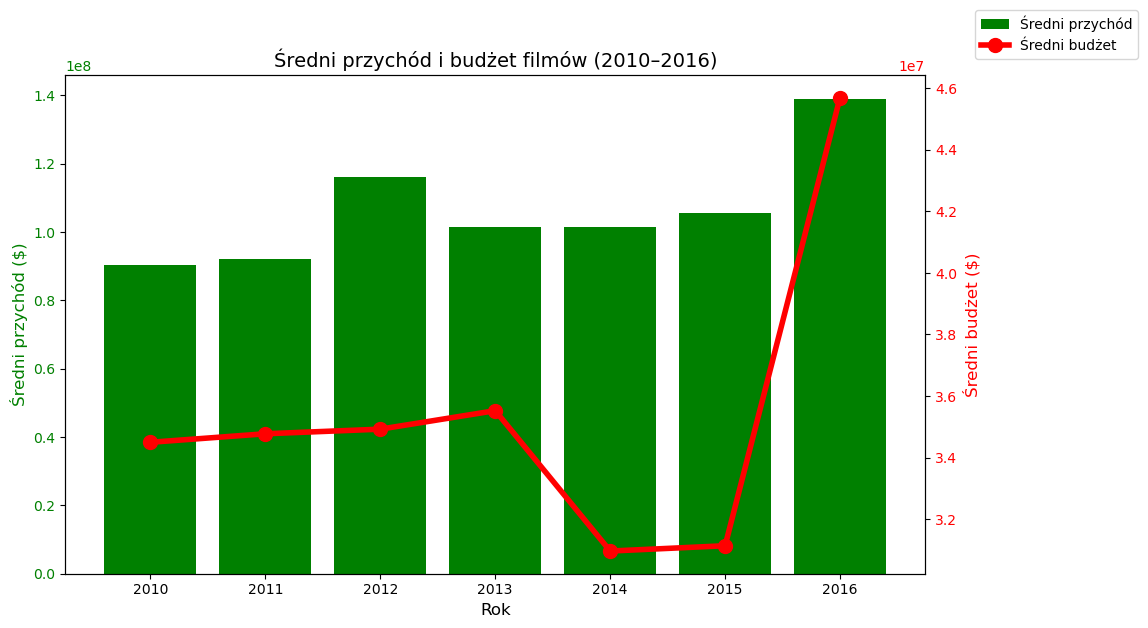

In [41]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(
    grouped_data["year"],
    grouped_data["revenue"],
    color="green",
    label="Średni przychód",
)
ax2 = ax1.twinx()
ax2.plot(
    grouped_data["year"],
    grouped_data["budget"],
    color="red",
    marker="o",
    markersize=10,
    linewidth=4,
    label="Średni budżet",
)

ax1.set_xlabel("Rok", fontsize=12)
ax1.set_ylabel("Średni przychód ($)", fontsize=12, color="green")
ax2.set_ylabel("Średni budżet ($)", fontsize=12, color="red")
ax1.set_title("Średni przychód i budżet filmów (2010–2016)", fontsize=14)
ax1.tick_params(axis="y", labelcolor="green")
ax2.tick_params(axis="y", labelcolor="red")
ax1.set_xticks(grouped_data["year"])
fig.legend(loc="upper right", bbox_to_anchor=(1.15, 1.05), fontsize=10)
fig.tight_layout()
plt.show()

## 3. Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu.

In [12]:
genres_df = genres_df.rename(columns={"Unnamed: 0": "genre_id", "genres": "genre_name"})
movies_with_genres = movies_df.merge(genres_df, on="genre_id", how="left")

## 4. Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?

In [14]:
most_frequent_genre_info = movies_with_genres["genre_name"].value_counts().reset_index()
most_frequent_genre_info.columns = ["genre_name", "count"]
most_frequent_genre_name = most_frequent_genre_info.iloc[0]["genre_name"]
most_frequent_genre_count = most_frequent_genre_info.iloc[0]["count"]
print(
    f"Najczęściej występujący gatunek: {most_frequent_genre_name} ({most_frequent_genre_count} filmów)"
)

Najczęściej występujący gatunek: Drama (1207 filmów)


## 5. Filmy, którego gatunku trwają średnio najdłużej (runtime)?

In [16]:
avg_runtime_per_genre = (
    movies_with_genres.groupby("genre_name")["runtime"].mean().reset_index()
)
longest_runtime_genre = avg_runtime_per_genre.loc[
    avg_runtime_per_genre["runtime"].idxmax()
]
print(
    f"Gatunek z największym średnim czasem trwania: {longest_runtime_genre['genre_name']} ({longest_runtime_genre['runtime']:.2f} minut)"
)

Gatunek z największym średnim czasem trwania: History (133.96 minut)


## 6. Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania.

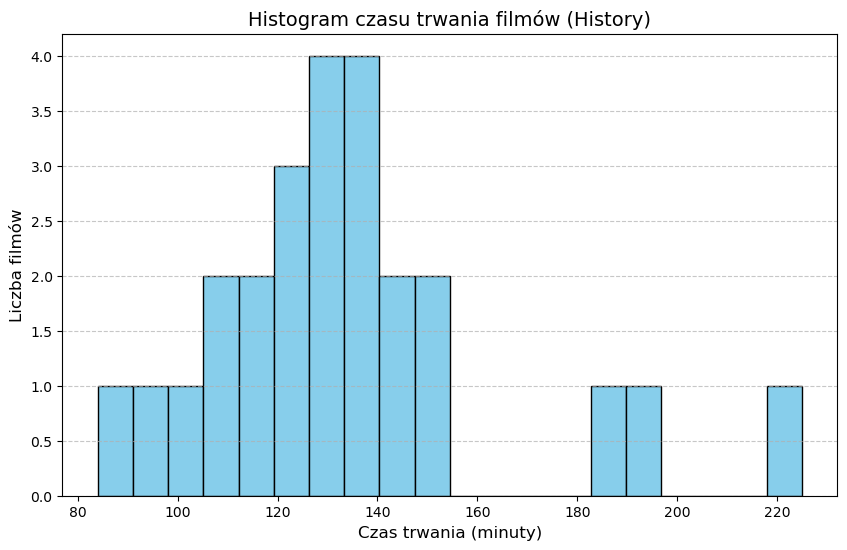

In [18]:
longest_runtime_genre_movies = movies_with_genres[
    movies_with_genres["genre_name"] == longest_runtime_genre["genre_name"]
]

plt.figure(figsize=(10, 6))
plt.hist(
    longest_runtime_genre_movies["runtime"].dropna(),
    bins=20,
    color="skyblue",
    edgecolor="black",
)
plt.title(
    f"Histogram czasu trwania filmów ({longest_runtime_genre['genre_name']})",
    fontsize=14,
)
plt.xlabel("Czas trwania (minuty)", fontsize=12)
plt.ylabel("Liczba filmów", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()